<a href="https://colab.research.google.com/github/Lokesh99999/Flutter/blob/master/custom%20imageclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 348.9MB 48kB/s 
     |████████████████████████████████| 3.1MB 34.9MB/s 
     |████████████████████████████████| 501kB 42.4MB/s 
  Found existing installation: tb-nightly 1.15.0a20190806
    Uninstalling tb-nightly-1.15.0a20190806:
      Successfully uninstalled tb-nightly-1.15.0a20190806
  Found existing installation: tf-estimator-nightly 1.14.0.dev2019080601
    Uninstalling tf-estimator-nightly-1.14.0.dev2019080601:
      Successfully uninstalled tf-estimator-nightly-1.14.0.dev2019080601
  Found existing installation: tensorflow-gpu 2.0.0rc0
    Uninstalling tensorflow-gpu-2.0.0rc0:
      Successfully uninstalled tensorflow-gpu-2.0.0rc0


In [0]:
#from tensorflow import keras
#from keras.preprocessing.image import ImageDataGenerator

In [0]:

# create generator
#datagen = ImageDataGenerator()
# prepare an iterators for each dataset
#train_it = datagen.flow_from_directory('data/train/', class_mode='binary')
#val_it = datagen.flow_from_directory('data/validation/', class_mode='binary')
#test_it = datagen.flow_from_directory('data/test/', class_mode='binary')
# confirm the iterator works
#batchX, batchy = train_it.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [0]:
!pip install tensorflow_hub
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [0]:
import tensorflow as tf

import tensorflow_hub as hub


In [0]:


pd.set_option("display.precision", 8)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_root='/content/drive/My Drive/persons'

In [0]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)


/content/drive/My Drive/persons
Found 2 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [0]:
image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)


Image batch shape:  (16, 224, 224, 3)
Label batch shape:  (16, 2)
['Hem' 'Lok']


In [0]:

model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  2257984   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=10,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.4373 - acc: 0.3750 - val_loss: 0.9556 - val_acc: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 88ms/step - loss: 1.0905 - acc: 0.3125 - val_loss: 0.7277 - val_acc: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 87ms/step - loss: 0.6273 - acc: 0.5625 - val_loss: 0.5424 - val_acc: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 97ms/step - loss: 0.7547 - acc: 0.5000 - val_loss: 0.3942 - val_acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 84ms/step - loss: 0.4326 - acc: 0.8125 - val_loss: 0.2845 - val_acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 85ms/step - loss: 0.3890 - acc: 0.7500 - val_loss: 0.2054 - val_acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 87ms/step - loss: 0.1986 - acc: 1.0000 - val_loss: 0.1494 - val_acc: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 88ms/step - loss: 0.1262 - acc: 1.0000 - val_l

In [0]:
#SHOE_SAVED_MODEL = "saved_models/shoe"
#tf.keras.experimental.export_saved_model(model, SHOE_SAVED_MODEL)
#shoe_model = tf.keras.experimental.load_from_saved_model(SHOE_SAVED_MODEL,
#custom_objects={'KerasLayer':hub.KerasLayer})

AttributeError: ignored

In [0]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)


Validation batch shape: (2, 224, 224, 3)


In [0]:

tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Hem,Lok
0,0.93103826,0.06896178
1,0.05154335,0.94845670


In [0]:
val_image_batch

(2, 224, 224, 3)

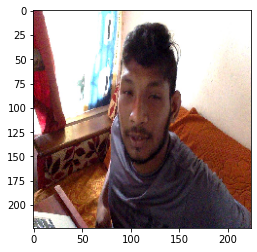

In [0]:
plt.imshow(val_image_batch[1])